In [1]:
# Task 02
# Customer retail store

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
print(f"Name of rows : {df.shape[0]} and columns :{df.shape[1]}")

Name of rows : 200 and columns :5


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
print(" -- Attributes in Data -- ")
for cols in df.columns:
    print(cols)

 -- Attributes in Data -- 
CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [10]:
# Convert categorical gender into numerical values
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [11]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


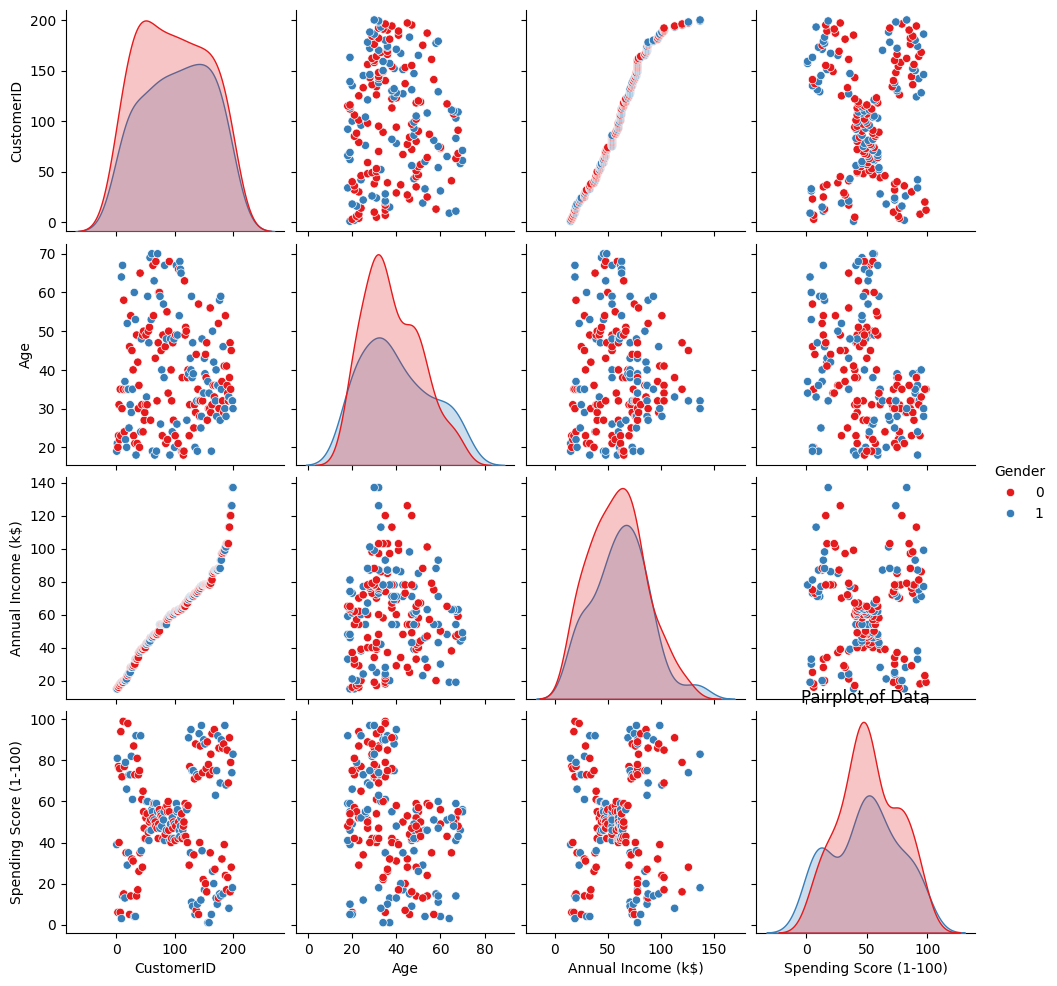

In [13]:
sns.pairplot(df, hue='Gender', kind='scatter', diag_kind='kde', palette='Set1')
plt.title("Pairplot of Data")
plt.show()

In [14]:
# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [15]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

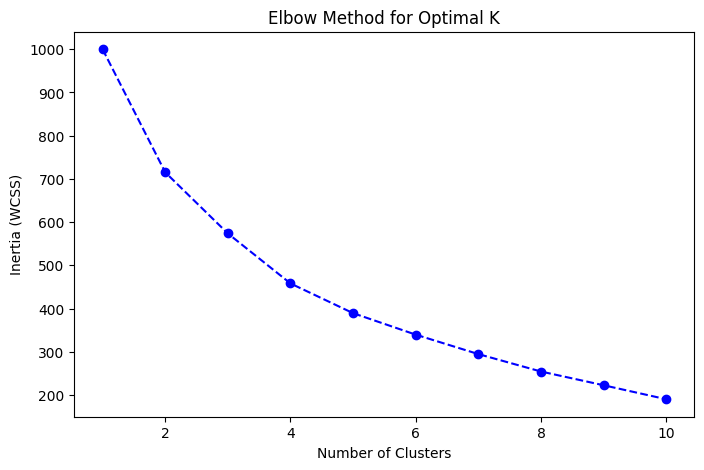

In [16]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="--", color="blue")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [17]:
# Choose the optimal K (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

In [18]:
# Visualize Clusters using PCA (2D Projection)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

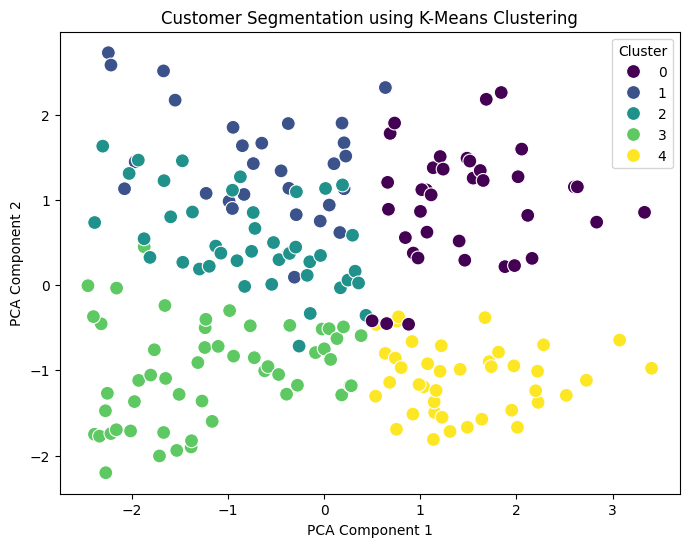

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df["Cluster"], palette="viridis", data=df, s=100)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [20]:
# Display cluster-wise customer statistics
print("\nCluster Summary:\n", df.groupby("Cluster").mean())


Cluster Summary:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        162.891892  0.513514  39.891892           87.432432   
1         70.275862  1.000000  56.724138           48.068966   
2         71.634146  0.000000  49.463415           48.780488   
3         50.169811  0.396226  24.886792           38.509434   
4        160.975000  0.475000  32.550000           86.050000   

         Spending Score (1-100)      PCA1      PCA2  
Cluster                                              
0                     18.837838  1.465628  0.948505  
1                     39.724138 -0.664970  1.417463  
2                     41.658537 -0.769048  0.526821  
3                     60.830189 -1.173837 -1.014042  
4                     81.475000  1.470006 -1.101414  
